# 와인데이터

## 1. 회귀
- 뭘 회귀해?

In [2]:
import pandas as pd
import numpy as np
import torch

In [3]:
df = pd.read_csv('../data/winequality-white.csv', delimiter=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [39]:
df.corr().abs().sum(axis=0) # target -> density : 사유 : 그냥,

fixed acidity           2.507326
volatile acidity        1.850437
citric acid             2.322956
residual sugar          3.644713
chlorides               2.531486
free sulfur dioxide     2.868784
total sulfur dioxide    3.807706
density                 4.617563
pH                      2.379436
sulphates               1.653964
alcohol                 4.128721
quality                 2.703805
dtype: float64

In [9]:
# object 형 찾기 -> 순서 상관이 있는 데이터인가? 
for col in df.columns:
    if df[col].nunique() <= 15:
        print(df[col].value_counts())
        print()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


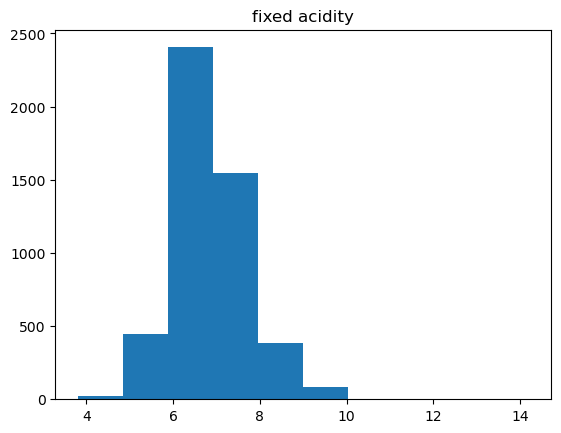

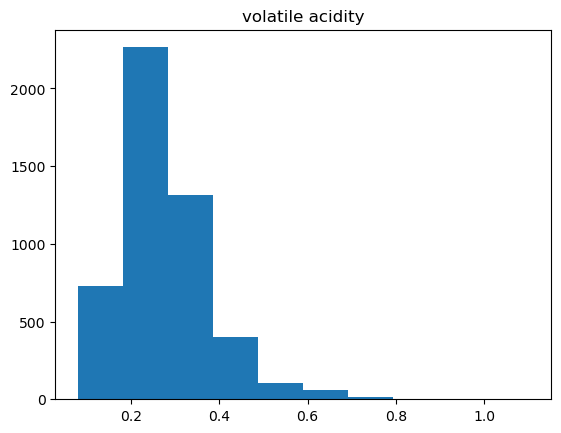

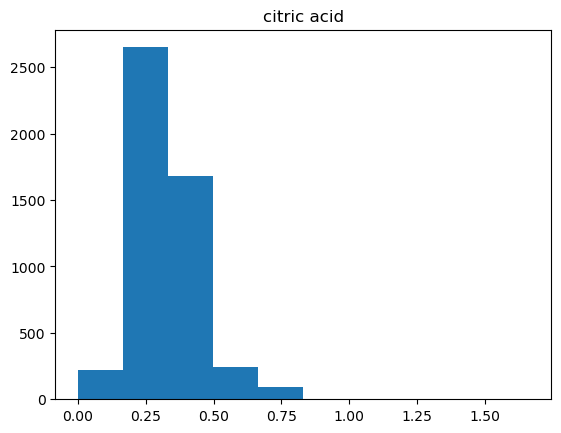

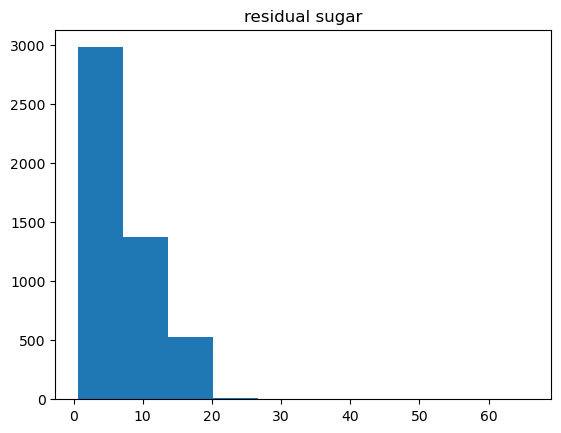

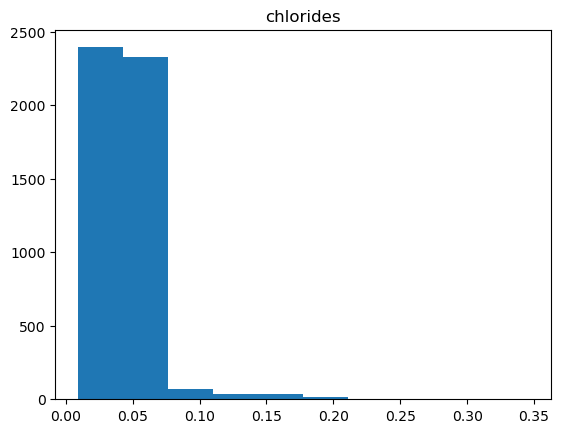

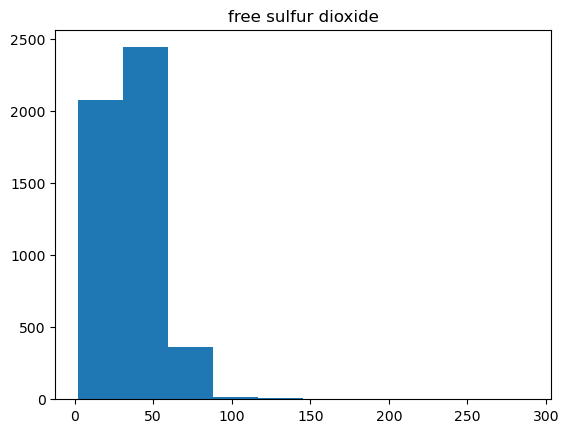

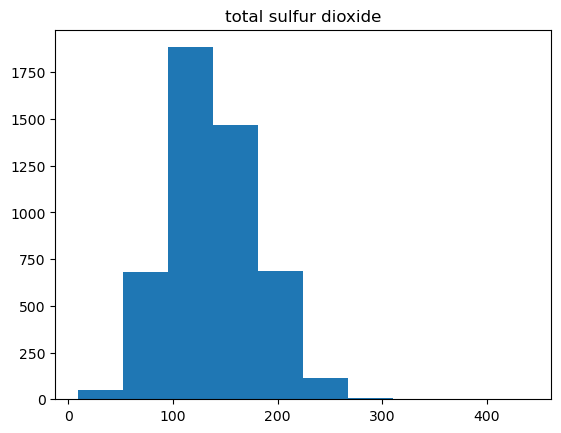

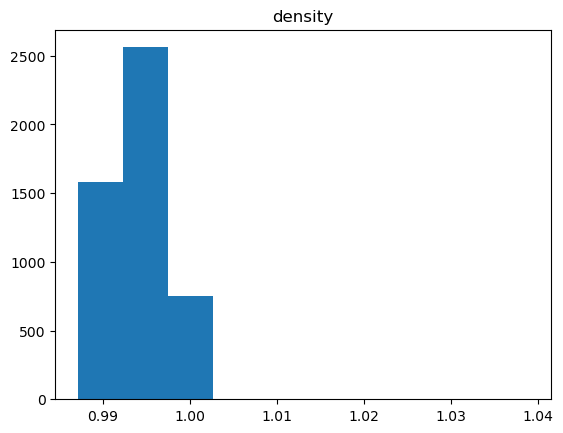

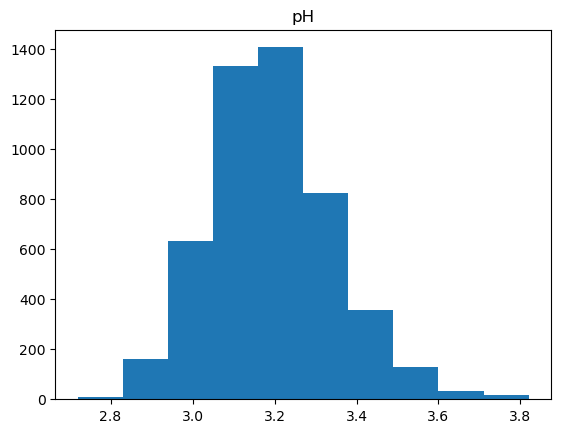

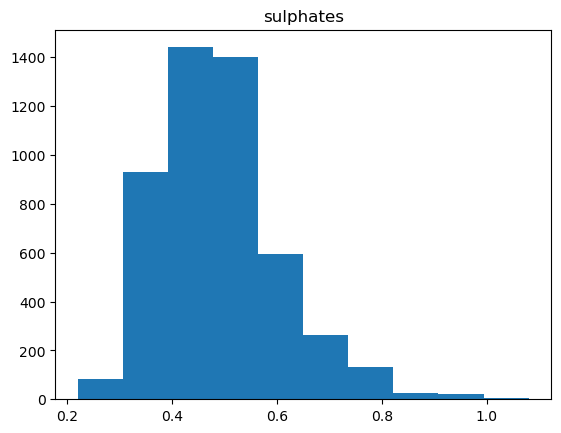

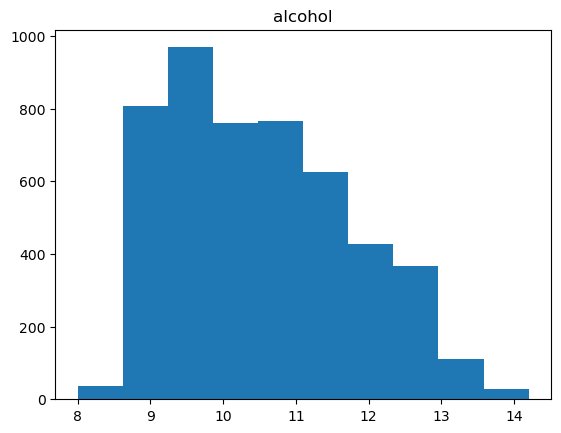

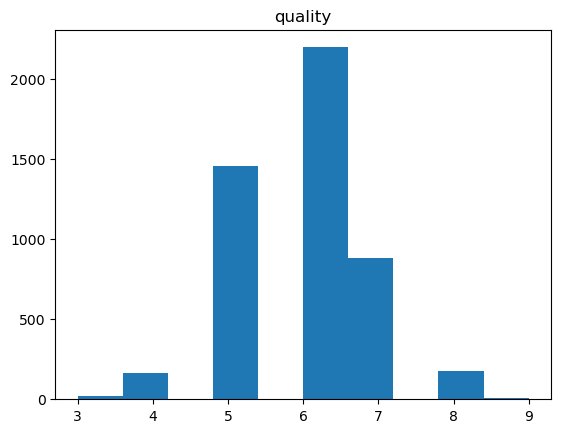

In [10]:
import matplotlib.pyplot as plt # 그래프
for col in df.columns:
    plt.hist(df[col]) #dafault bins = 10
    plt.title(col)
    plt.show()

# DL

In [12]:
#모듈 로딩(전처리 생략)
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [25]:
from sklearn.model_selection import train_test_split # 분리
featureDF = df.drop('density', axis=1)
targetSR = df["density"]

X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2, random_state = 5)

In [26]:
X_train = torch.tensor(X_train.values).float()
X_test = torch.tensor(X_test.values) 
y_train = torch.tensor(y_train.values).float()
y_test = torch.tensor(y_test.values)

In [27]:
# 가중치와 편향 선언
W = torch.zeros((len(featureDF.columns), 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [28]:
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

In [29]:
# 학습 진행 -------------------------------------------------
nb_epochs = 20
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = X_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2) # MSE

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print(f'Epoch {epoch:4d}/{nb_epochs} hypothesis: { hypothesis.squeeze().detach()} Cost: {cost.item():.6f}')
    

Epoch    0/20 hypothesis: tensor([0., 0., 0.,  ..., 0., 0., 0.]) Cost: 0.988081
Epoch    1/20 hypothesis: tensor([0.4555, 0.3617, 0.4787,  ..., 0.2739, 0.5101, 0.2425]) Cost: 0.357114
Epoch    2/20 hypothesis: tensor([0.7057, 0.5604, 0.7416,  ..., 0.4245, 0.7904, 0.3757]) Cost: 0.166643
Epoch    3/20 hypothesis: tensor([0.8433, 0.6696, 0.8861,  ..., 0.5072, 0.9443, 0.4491]) Cost: 0.109110
Epoch    4/20 hypothesis: tensor([0.9189, 0.7296, 0.9654,  ..., 0.5527, 1.0288, 0.4894]) Cost: 0.091696
Epoch    5/20 hypothesis: tensor([0.9605, 0.7626, 1.0089,  ..., 0.5778, 1.0752, 0.5117]) Cost: 0.086390
Epoch    6/20 hypothesis: tensor([0.9833, 0.7808, 1.0328,  ..., 0.5916, 1.1007, 0.5240]) Cost: 0.084738
Epoch    7/20 hypothesis: tensor([0.9960, 0.7909, 1.0459,  ..., 0.5992, 1.1146, 0.5308]) Cost: 0.084188
Epoch    8/20 hypothesis: tensor([1.0030, 0.7964, 1.0531,  ..., 0.6035, 1.1223, 0.5347]) Cost: 0.083972
Epoch    9/20 hypothesis: tensor([1.0068, 0.7995, 1.0570,  ..., 0.6059, 1.1264, 0.5369])

In [38]:
(W * torch.tensor(featureDF.iloc[0])).sum() + b 
# 전처리 전 예측치는 2.6112 정답은 1.0010 망했노ㅠㅠ

tensor([2.6112], grad_fn=<AddBackward0>)

# ML

In [40]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2, random_state = 5)

from sklearn.linear_model import LinearRegression # 선형회귀

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
print(LR_model.score(X_train, y_train), LR_model.score(X_test, y_test))

0.9633811601979135 0.9712167892774045
